<a href="https://colab.research.google.com/github/jtlai0921/-/blob/master/%E3%80%8Cyolo_display_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
import sys
FOLDER_PATH = '/content/drive/MyDrive/緯育AI瑕疵檢測/Day3/keras-yolo3'
sys.path.append(FOLDER_PATH)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import tensorflow as tf
print(tf.__version__)

1.15.2


In [9]:
import numpy as np
import keras.backend as K
from keras.layers import Input, Lambda
from train import yolo_body, get_anchors, create_model, get_classes
from yolo import YOLO
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from glob import glob
import os

In [10]:
classes_path = os.path.join(FOLDER_PATH, 'model_data/aoi_classes.txt')
class_names = get_classes(classes_path)
num_classes = len(class_names)
anchors_path = os.path.join(FOLDER_PATH, 'model_data/yolo_anchors.txt') 
anchors = get_anchors(anchors_path)

yolo = YOLO(model_path=os.path.join(FOLDER_PATH, 'ep084-loss22.021-val_loss21.299.h5'), 
            classes_path=classes_path,
            anchors_path=anchors_path)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
/content/drive/MyDrive/緯育AI瑕疵檢測/Day3/keras-yolo3/ep084-loss22.021-val_loss21.299.h5 model, anchors, and classes loaded.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/content/drive/MyDrive/緯育AI瑕疵檢測/Day3/keras-yolo3/dataset/train_img/patches_132.jpg
(200, 200) (416, 416)
(416, 416, 3)
Found 2 boxes for img
patches 0.69 (125, 2) (194, 199)
patches 0.90 (10, 1) (57, 111)
7.189755909999974


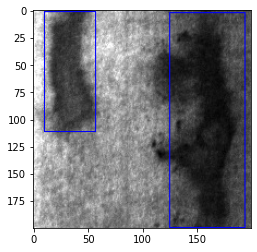

In [11]:
path = np.random.choice(glob(os.path.join(FOLDER_PATH, 'dataset/train_img/*')), 1)[0]
print(path)
image = Image.open(path)
r_image = yolo.detect_image(image)
r_image.show()
plt.imshow(r_image)

/content/drive/MyDrive/緯育AI瑕疵檢測/Day3/keras-yolo3/dataset/train_img/crazing_66.jpg
(200, 200) (416, 416)
(416, 416, 3)
Found 0 boxes for img
0.04076990300001171


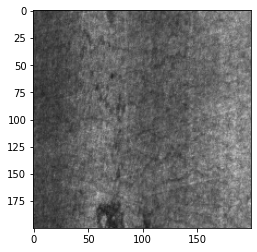

In [12]:
path = np.random.choice(glob(os.path.join(FOLDER_PATH, 'dataset/train_img/*')), 1)[0]
print(path)
image = Image.open(path)
r_image = yolo.detect_image(image)
r_image.show()
plt.imshow(r_image)

/content/drive/MyDrive/緯育AI瑕疵檢測/Day3/keras-yolo3/dataset/train_img/pitted_surface_183.jpg
(200, 200) (416, 416)
(416, 416, 3)
Found 1 boxes for img
pitted_surface 0.82 (5, 0) (194, 200)
0.041730578999988666


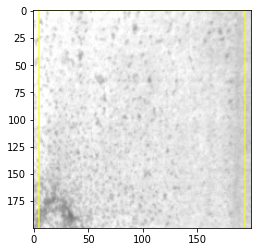

In [13]:
path = np.random.choice(glob(os.path.join(FOLDER_PATH, 'dataset/train_img/*')), 1)[0]
print(path)
image = Image.open(path)
r_image = yolo.detect_image(image)
r_image.show()
plt.imshow(r_image)

## Yolo pretrained COCO

In [14]:
classes_path = os.path.join(FOLDER_PATH, 'model_data/coco_classes.txt')
class_names = get_classes(classes_path)
num_classes = len(class_names)
anchors_path = os.path.join(FOLDER_PATH, 'model_data/yolo_anchors.txt')
anchors = get_anchors(anchors_path)

yolo = YOLO(model_path= os.path.join(FOLDER_PATH, 'yolo_weights.h5'),
            classes_path=classes_path,
            anchors_path=anchors_path)

/content/drive/MyDrive/緯育AI瑕疵檢測/Day3/keras-yolo3/yolo_weights.h5 model, anchors, and classes loaded.


/content/drive/MyDrive/緯育AI瑕疵檢測/Day3/keras-yolo3/street.jpeg
(273, 185) (416, 416)
(416, 416, 3)
Found 11 boxes for img
car 0.21 (5, 101) (34, 111)
car 0.40 (75, 98) (88, 105)
car 0.50 (55, 98) (77, 106)
person 0.84 (157, 89) (175, 153)
person 0.95 (92, 124) (100, 152)
person 0.95 (83, 128) (91, 156)
person 0.98 (196, 110) (215, 172)
person 0.98 (174, 100) (201, 174)
person 0.98 (146, 106) (165, 169)
person 0.99 (115, 98) (139, 166)
person 0.99 (218, 112) (239, 171)
2.2332109060000107


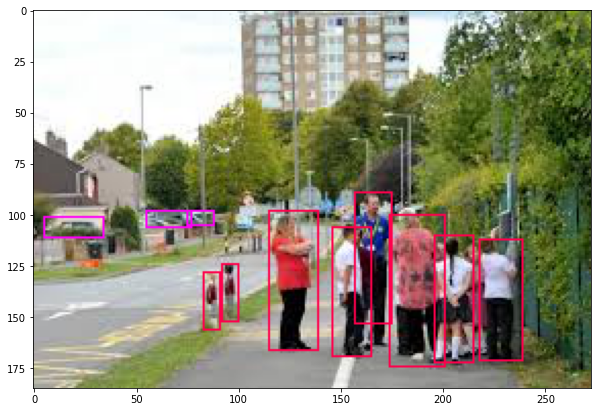

In [15]:
path = os.path.join(FOLDER_PATH, 'street.jpeg')
print(path)
image = Image.open(path)
r_image = yolo.detect_image(image)
r_image.show()
plt.figure(figsize=(10,10))
plt.imshow(r_image)